In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn import datasets
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

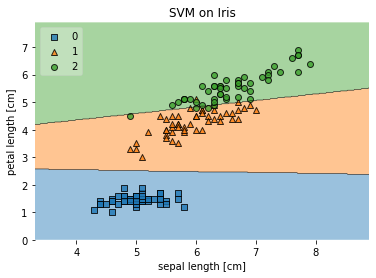

In [4]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [5]:
iris_data = pd.read_csv("../input/iris/Iris.csv")
X = iris_data.drop(['Species'], axis = 1)
X = X.drop(['Id'], axis = 1)
y = iris_data['Species']

print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [6]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

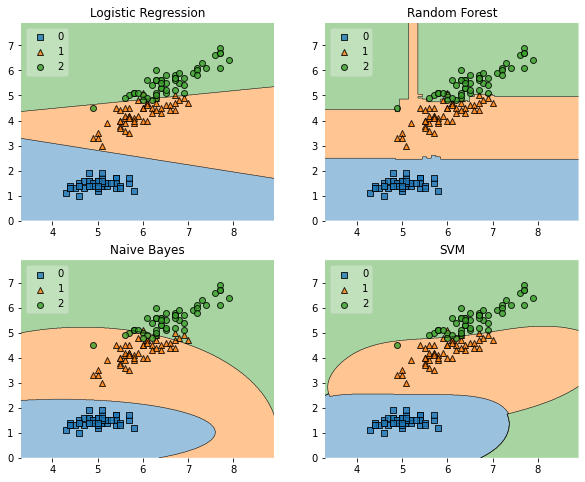

In [7]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

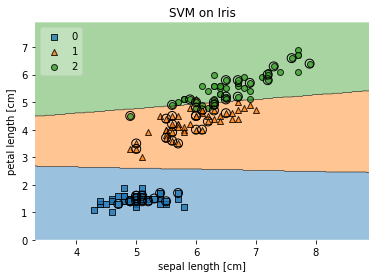

In [8]:
# Loading some example data
iris = datasets.load_iris()
X, y = iris.data[:, [0,2]], iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)

X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2, 
                      X_highlight=X_test)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [9]:
import torch
from torch import nn

import torch.nn.functional as F

In [10]:
class Model (nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 3)
        
    def forward(self, X):
        X = F.relu(self.layer1(X))
        X = F.relu(self.layer2(X))
        X = self.layer1(X)
        X_soft = F.sotfmax(X, dim=1)
        return X, X_soft



In [11]:
device = torch.device('cuda')
from torch.utils.data import DataLoader, Dataset

In [12]:
class DataIRIS(Dataset):
    
    def __init__(self, split):
        if split == "train":
            self.X = x_train
            self.y = y_train
        else:
            self.X = x_test
            self.y = y_test
        self.X = torch.from_numpy(self.X).to(device)
        self.y = torch.from_numpy(self.y).to(device)
        
    def __len__(self):
        return self.X.size()[0]
    def __getitem__(self, index):
        features = self.X[index]
        label = self.y[index]
        return features, label

        

In [13]:
from sklearn.model_selection import train_test_split

iris_data = pd.read_csv("../input/iris/Iris.csv")

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:

X = iris_data.drop(['Species'], axis = 1)
X = X.drop(['Id'], axis = 1)
X = X.to_numpy()
y = iris_data['Species'].factorize()[0]

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=5)

print('X train: ', x_train, '\n')
print('X test: ', x_test, '\n')
print('Y train', y_train, '\n')
print('Y test', y_test, '\n')

X train:  [[5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.9 1.4]
 [4.8 3.  1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [7.9 3.8 6.4 2. ]
 [5.  2.3 3.3 1. ]
 [4.6 3.2 1.4 0.2]
 [6.5 3.  5.5 1.8]
 [4.9 3.1 1.5 0.1]
 [

In [15]:
batch_size = 64
test_size = x_test.shape[0]
train_dataset = DataIRIS('train')
test_dataset = DataIRIS('test')
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = test_size, shuffle = False)
train_iter = iter(train_loader)
feat, lab = train_iter.next()
print('feature shape on batch size = ', feat.size())
print('labels shape on batch size = ', lab.size())

feature shape on batch size =  torch.Size([64, 4])
labels shape on batch size =  torch.Size([64])


In [16]:
model = Model(x_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 100